## Final Project Submission

Please fill out:
* Group 5 - Joyce Njeri, Kenneth Kipkirui, Brian Bett, Innocent Mbuvi, Michelle Nyaanga
* Instructor name: Nikita Njoroge



# Business Understanding

## Overview / Background 

The real estate market in a northwestern county is experiencing unpredictable fluctuations in property prices. This uncertainty makes it difficult for real estate professionals, potential buyers, and developers to make informed decisions about buying, selling, or investing in property. This study analyzes the northwestern county real-estate market. 
The Stakeholders of this study are Real Estate Agencies who are responsible for representing homeowners and potential buyers' interest

## Business problem / Challenges

The fluctuating real estate market in a northwestern county is making it challenging for real estate agents, homebuyers,homeowners, and property developers in the following ways:

Real estate agents - Because of the volatile market, it is challenging to appropriately value properties and advice customers on competitive pricing tactics.

Homebuyers - Uncertainty in making informed decisions due to unpredictable market trends and potential overpricing of properties.

Homeowners - Challenges in maximising their return on investment by figuring out the best moment to sell their property, considering the volatility of the market.

Property developers - The fluctuation of land prices and the unpredictability of the market demand for new properties make it challenging to evaluate the viability of development projects.

### Proposed Solution

To better understand the factors that influence house sales and forecast future trends, a comprehensive analysis using multiple linear regression modeling is required. This model will analyzze historical data about the northwestern county market and allows the real estate agencies to  make informed decisions for their business and their clients.

### Conclusion

The difficulties encountered by different parties in the volatile real estate market in the northwest county have been identified by this study. The proposed solution, a linear regression model for house price prediction, aims to empower real estate agencies with valuable insights. By leveraging this model, agencies can guide their clients towards informed decisions in this uncertain market.


## Problem Statement
 The unpredictable fluctuations in property prices within the northwestern county are making it challenging for our agency to accurately advise clients on buying, selling, or investing in real estate. This uncertainty can lead to missed opportunities for both buyers and sellers, potentially hindering the agency's ability to secure successful transactions and maximize client satisfaction. The agency needs to find an informed way to provide advice to homeowners on finding the best price their client can sell their house at.


## Objectives

1. To analyze the King County House Sales dataset to identify statistically significant features that impact house prices, by utilizing  techniques such as correlation analysis.
1. To develop a simple linear regression model as the base model to predict house prices in northwestern county based on relevant features.
1. To build a multiple linear regression model that predicts the target variable, price,  whose coefficients are easily interpretable
1. To compare the performance of the multiple linear regression model with the simple linear model
1. To evaluate the model's accuracy and performance of the linear regression model using appropriate metrics such as mean squared error (MSE) or R-squared. 






# Data Understanding
### Data Sources
This study makes use of the King County House Sales dataset that is contained in a CSV file, "kc_house_data.csv". 


In [46]:

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

#import the script that has our functions with the alias 'f'
import project_functions as f

# Load the data
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#calling the function dataset_info from project_functions.py script.

f.dataset_info('data/kc_house_data.csv') 




Dimensionality of the dataset is as follows:
 
(21597, 21)

The columns contained in this dataset are : 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data types of features: 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

 DataFrame information

<class


## Feature Categories
There are 6 categorical columns, there are 12 numeric columns and 3 columns that contain temporal data.  

### Column Names and Descriptions for King County Data Set
The features in our dataset are as follows:
There are a total of 21 features;


### Numerical Data:


price: Sale price (prediction target)

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of living space in the home

sqft_lot: Square footage of the lot

floors: Number of floors (levels) in the house

sqft_above: Square footage of house apart from basement

sqft_basement: Square footage of the basement

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15: Square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15: Square footage of the land lots of the nearest 15 neighbors

### Categorical Data:

id: Unique identifier for a house

waterfront: Whether the house is on a waterfront

view: Quality of view from the house

condition: Overall condition of the house

grade: Overall grade of the house

zipcode: ZIP Code used by the United States Postal Service

### Temporal Data:

date: Date house was sold

yr_built: Year when the house was built

yr_renovated: Year when the house was renovated









# Data Preparation

For data preparation, we ignore/drop columns that we won't be using and check for null values and duplicates

In [4]:
# Displaying the DataFrame
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
# drop irrelant columns
columns_to_drop = ['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
new_data = data.drop(columns_to_drop,axis=1)
new_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [7]:
# drop null values
new_data = new_data.dropna()
new_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    19221 non-null  object 
 9   grade        19221 non-null  object 
 10  yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [9]:
null_values = new_data.isnull()
print(null_values.sum())

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


In [10]:
#check for duplicates
new_data.drop_duplicates()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


In [11]:
new_data.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 19221, dtype: bool

## Exploratory Data Analysis (EDA)

The exploratory process includes generating and visualizing histograms and box plots, which are essential for understanding the distribution patterns of the data across variables. Visualizing histograms enables us to grasp the frequency and spread of values within each variable, offering valuable insights for subsequent analysis. Additionally, box plots aid in identifying potential outliers within the data. This crucial step lays the groundwork for deeper analysis by providing a clear overview of the data's characteristics.

## Univariate analysis

In [12]:
# Identify the numeric columns
Numeric = ['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built']
Numeric

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built']

In [13]:
# Correlation matrix
correlation = new_data[Numeric].corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
price,1.000000,0.309651,0.527350,0.704652,0.087005,0.258277,0.053525
bedrooms,0.309651,1.000000,0.516188,0.578211,0.029407,0.182396,0.157512
bathrooms,0.527350,0.516188,1.000000,0.756341,0.085094,0.506214,0.507014
sqft_living,0.704652,0.578211,0.756341,1.000000,0.173345,0.357184,0.317443
sqft_lot,0.087005,0.029407,0.085094,0.173345,1.000000,-0.007246,0.055873
floors,0.258277,0.182396,0.506214,0.357184,-0.007246,1.000000,0.490252
yr_built,0.053525,0.157512,0.507014,0.317443,0.055873,0.490252,1.000000


In [14]:
# Checking on measures of central tendency and dispersion
price_mean = new_data["price"].mean()
price_mode = new_data["price"].mode()[0]
price_median = new_data["price"].median()
price_std = new_data["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)

Mean: 541639.8338275844
Mode: 450000.0
Median: 450000.0
Standard Deviation: 372247.78731248045


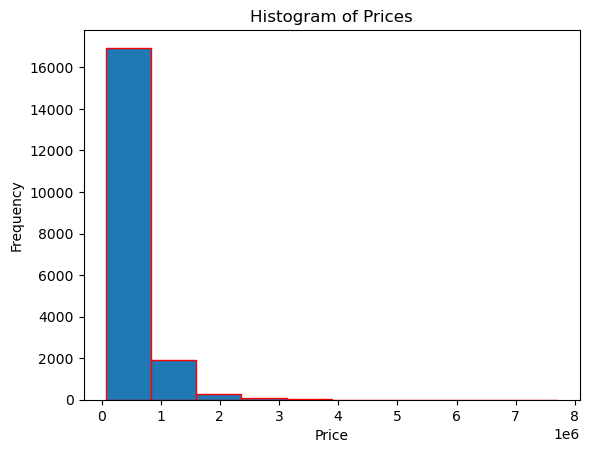

In [15]:
# Plotting a histogram of price

plt.hist(new_data["price"], bins=10, edgecolor='red')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.savefig('Visualization1')

C:\Users\innoc\AppData\Local\Temp\ipykernel_20996\1773983815.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  price_dist = sns.distplot(new_data["price"])
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


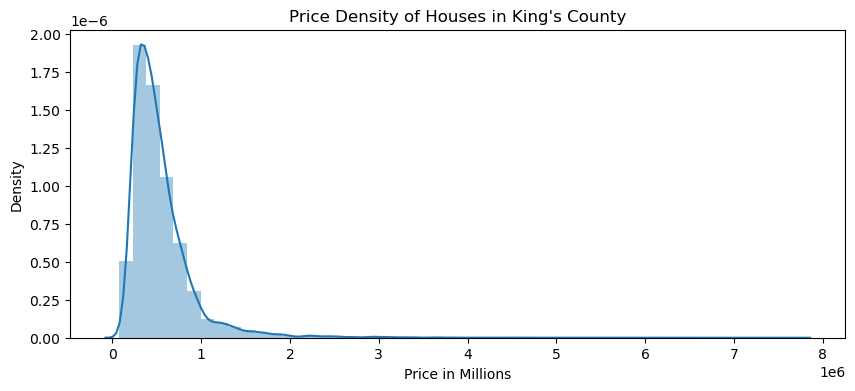

In [16]:
# Plotting a histogram/kernel density estimate of price

plt.figure(figsize=(10,4))

price_dist = sns.distplot(new_data["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.savefig('Visualization2')

The observation reveals that the distribution of house prices is right-skewed. This means that there are a large number of houses that are relatively not expensive, but there are also a small number of houses that are very expensive.

## Checking for linearity.

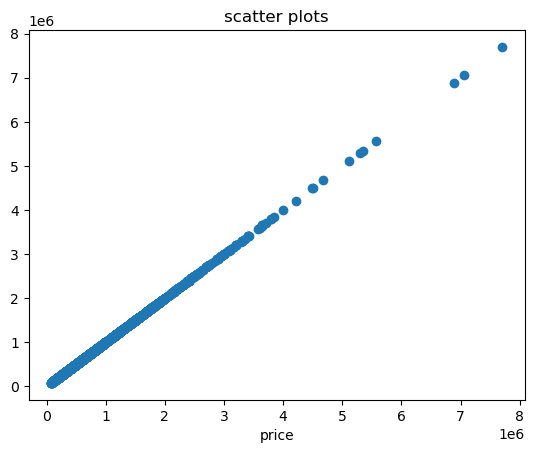

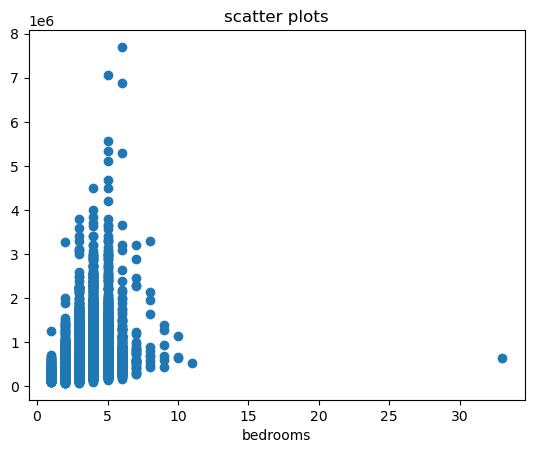

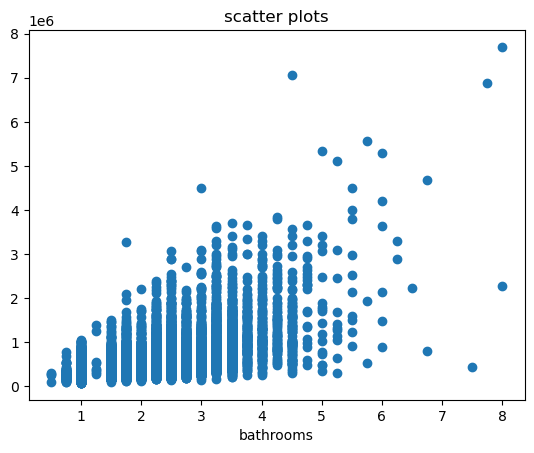

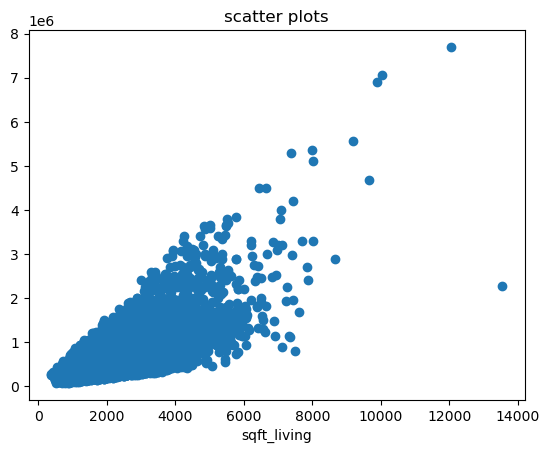

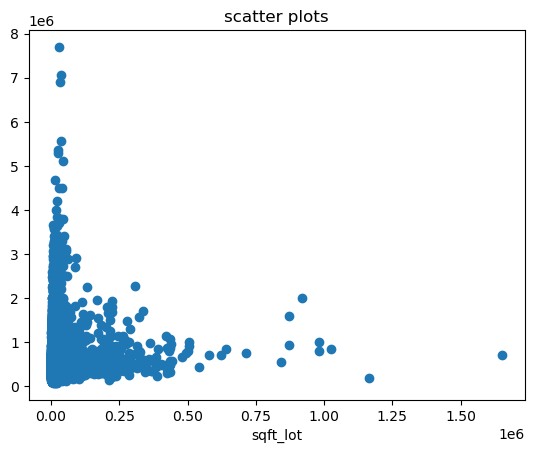

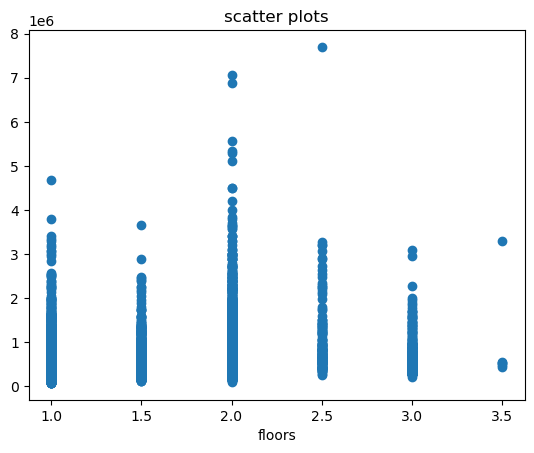

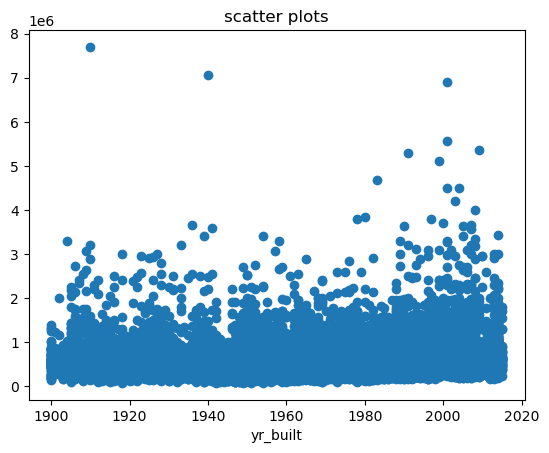

In [17]:
for column in Numeric:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(new_data[column], new_data['price'])
# set labels and title
    plt.xlabel(column)
    plt.title('scatter plots')
# display the plot.
    plt.show()


The variables sqft_living and bathrooms exhibit a nearly linear relationship, while the remaining variables demonstrate a discontinuous relationship with the target variable.

## Checking for outliers

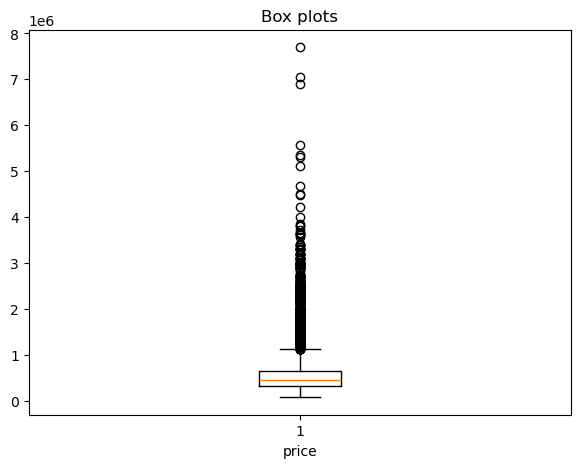

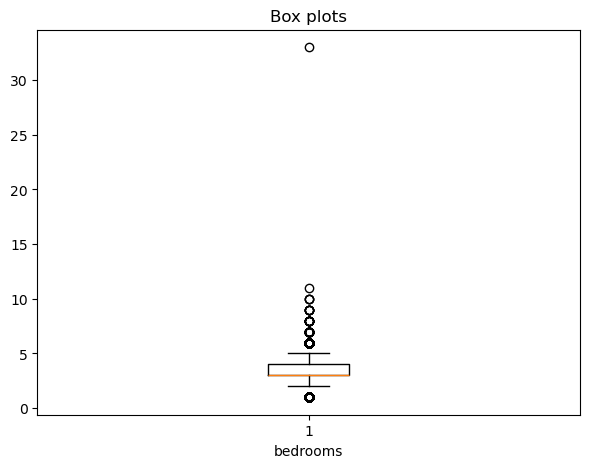

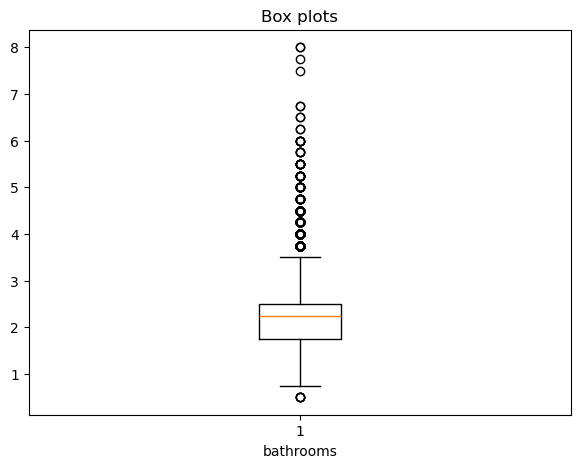

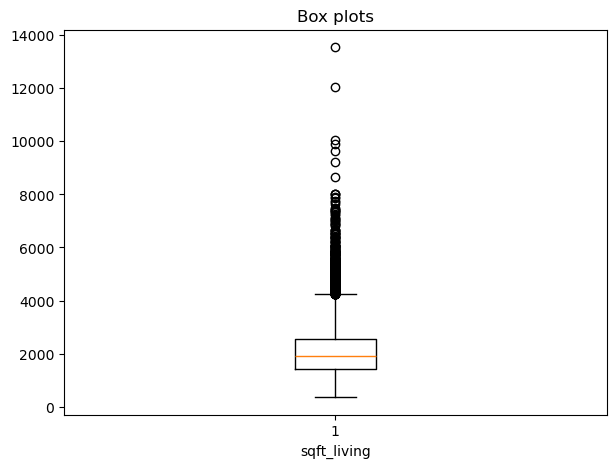

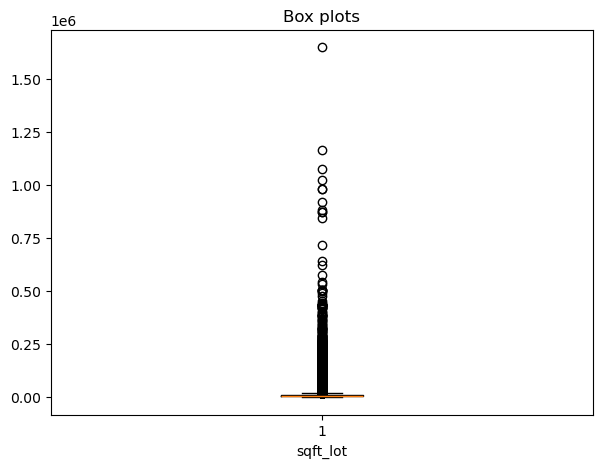

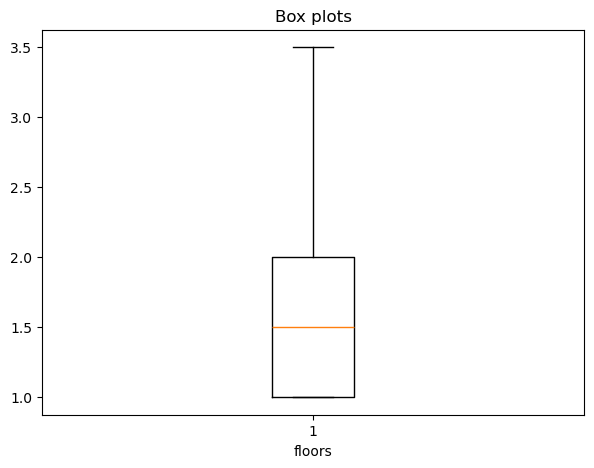

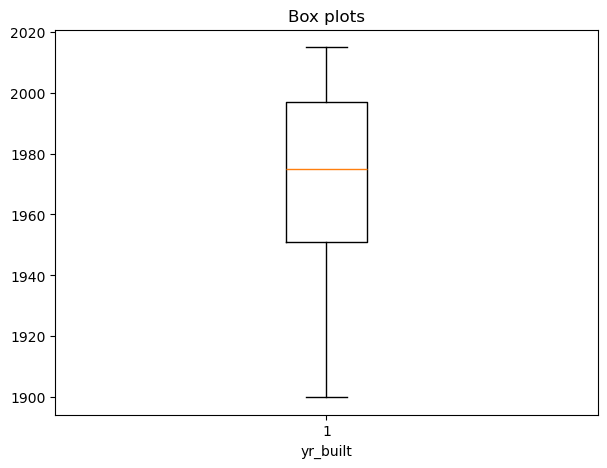

In [18]:
for column in Numeric:
    # plot the boxplots
    plt.figure(figsize = (7,5))
    plt.boxplot(df[column])
    # set the axes and title
    plt.xlabel(column)
    plt.title('Box plots')
    # display the plot
    plt.show()

In [19]:
'''
From the boxplots, we can see that there are outliers in the columns price, bedrooms,
bathrooms, sqft_living and sqft_lot. We will remove these outliers in the next step.
The method we will use to remove the outliers is the IQR method.

'''

'\nFrom the boxplots, we can see that there are outliers in the columns price, bedrooms,\nbathrooms, sqft_living and sqft_lot. We will remove these outliers in the next step.\nThe method we will use to remove the outliers is the IQR method.\n\n'

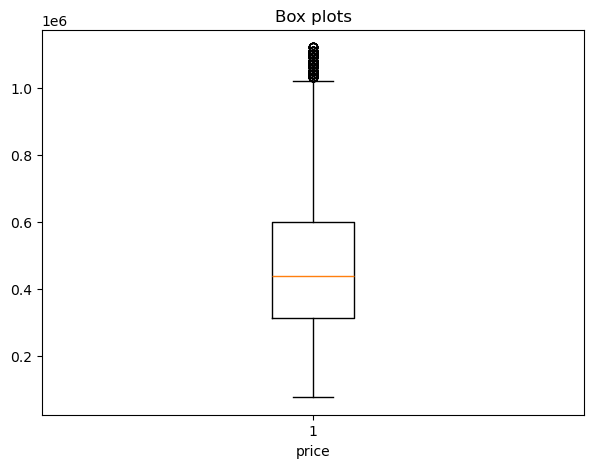

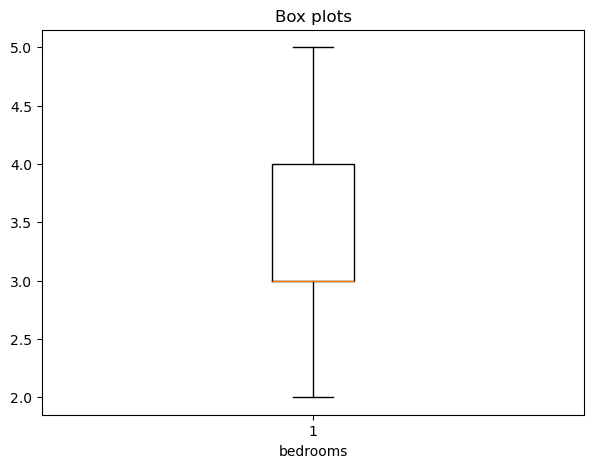

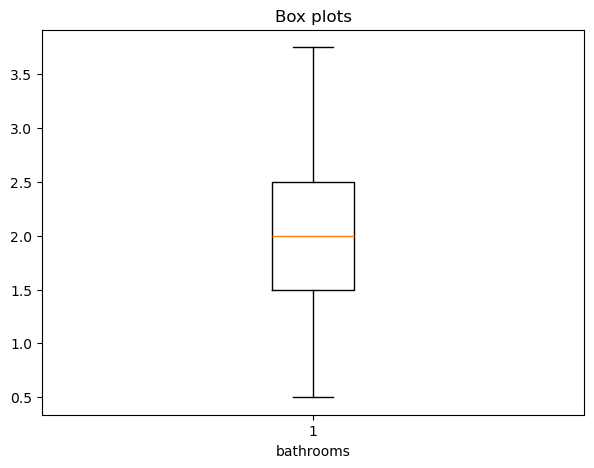

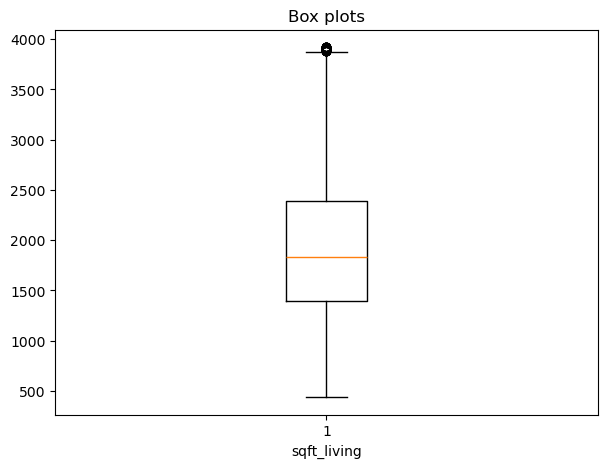

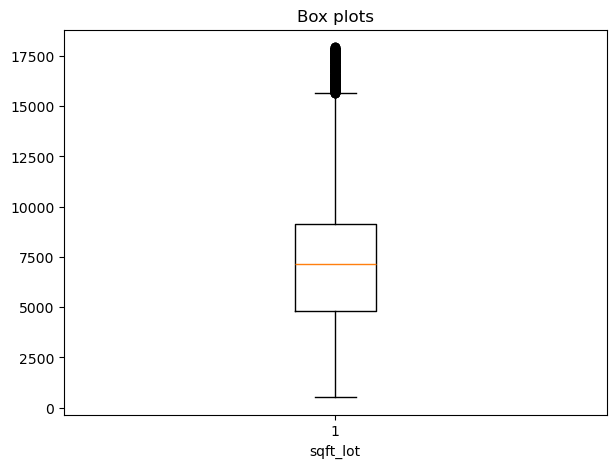

In [20]:
# Remove outliers
outlier_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

for column in outlier_columns:
    # use the IQR method to remove the outliers
    q1 = new_data[column].quantile(0.25)
    q3 = new_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    new_data = new_data[(new_data[column] > lower_bound) & (new_data[column] < upper_bound)]

    #plot the boxplot after removing the outliers
    plt.figure(figsize = (7,5))
    plt.boxplot(new_data[column])
    plt.xlabel(column)
    plt.title('Box plots')
    plt.show()





In [21]:
'''
From the boxplots, we can see that the outliers have been removed/reduced from the columns price, bedrooms,bathrooms, sqft_living and sqft_lot.
'''

'\nFrom the boxplots, we can see that the outliers have been removed/reduced from the columns price, bedrooms,bathrooms, sqft_living and sqft_lot.\n'

## Univariate analysis for categorical columns.

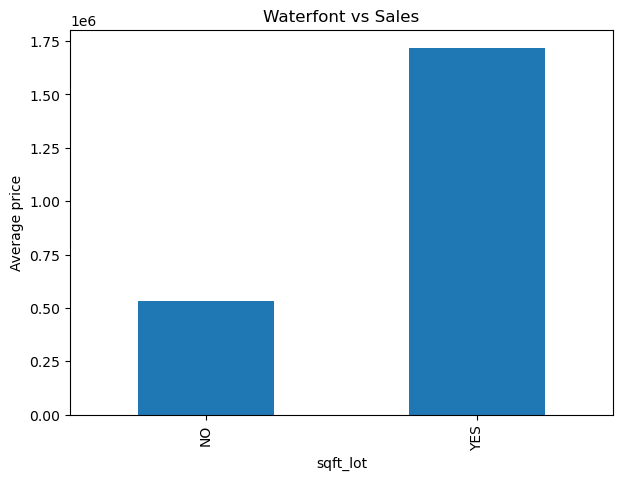

In [22]:
Categorical = ['waterfront', 'condition', 'grade'] 

# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

Based on the plot above it is clear that houses with waterfronts are most popular and sell the most.

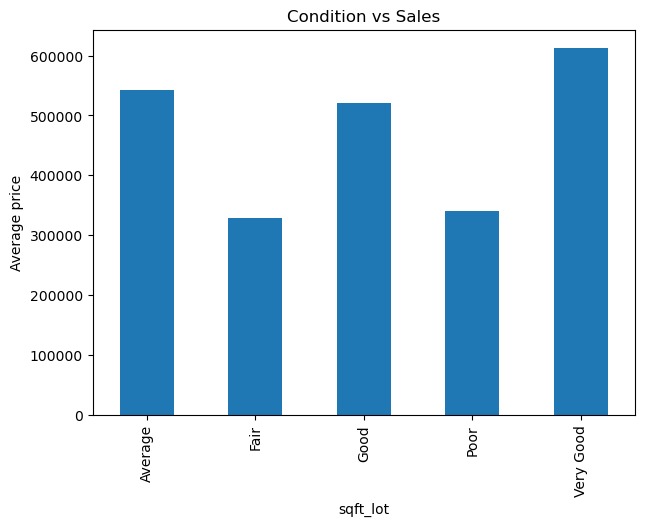

In [23]:
# How condition relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('condition')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Condition vs Sales')

# display the plot
plt.show()

Based on the plot above it is clear that houses that are in good conditions are most popular and sell the most.

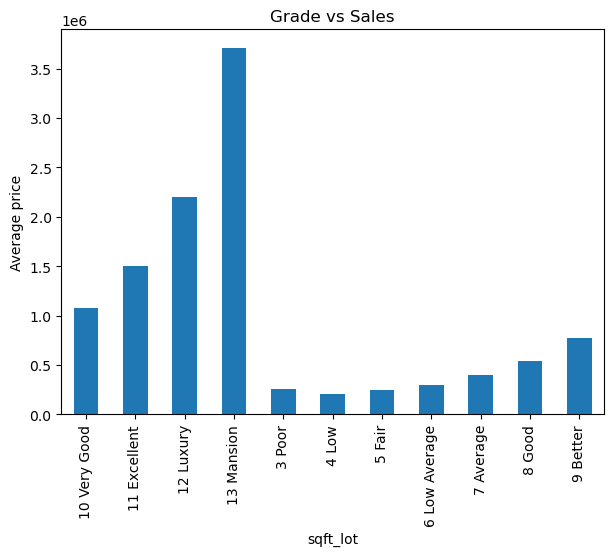

In [24]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()


From the plot above it is very clear that mansions are the most popular and are the hghest selling as compared to the others

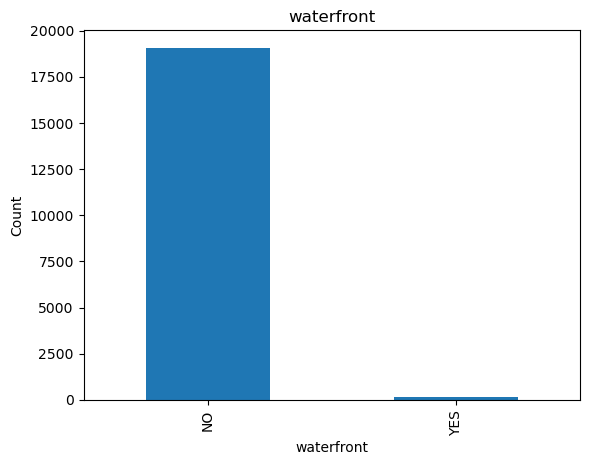

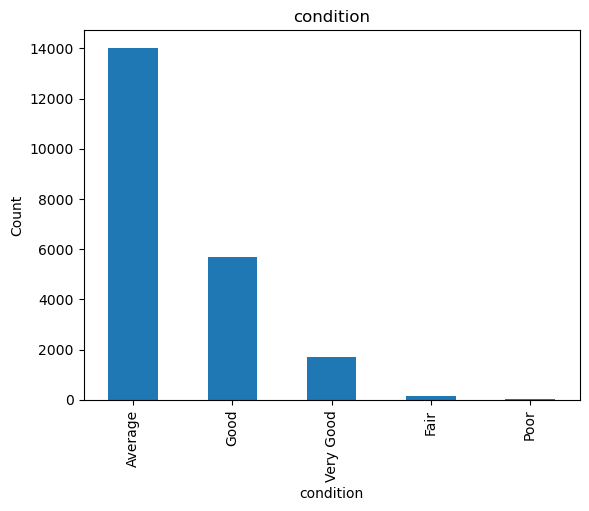

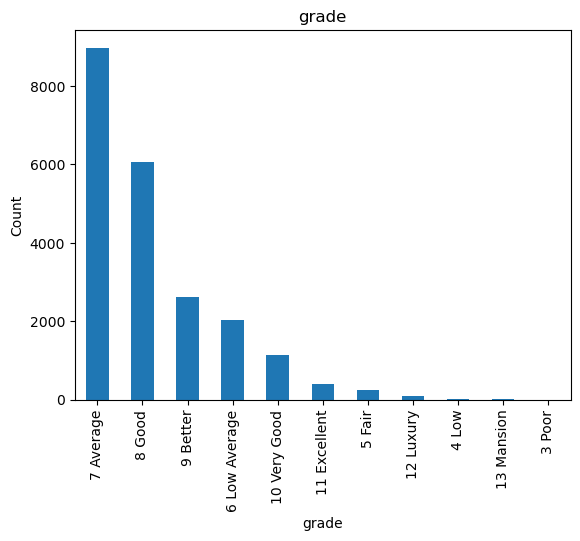

In [25]:
for column in Categorical:
    plt.figure()
    df[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use scatterplot to check on correlation and collinearity of the variables.

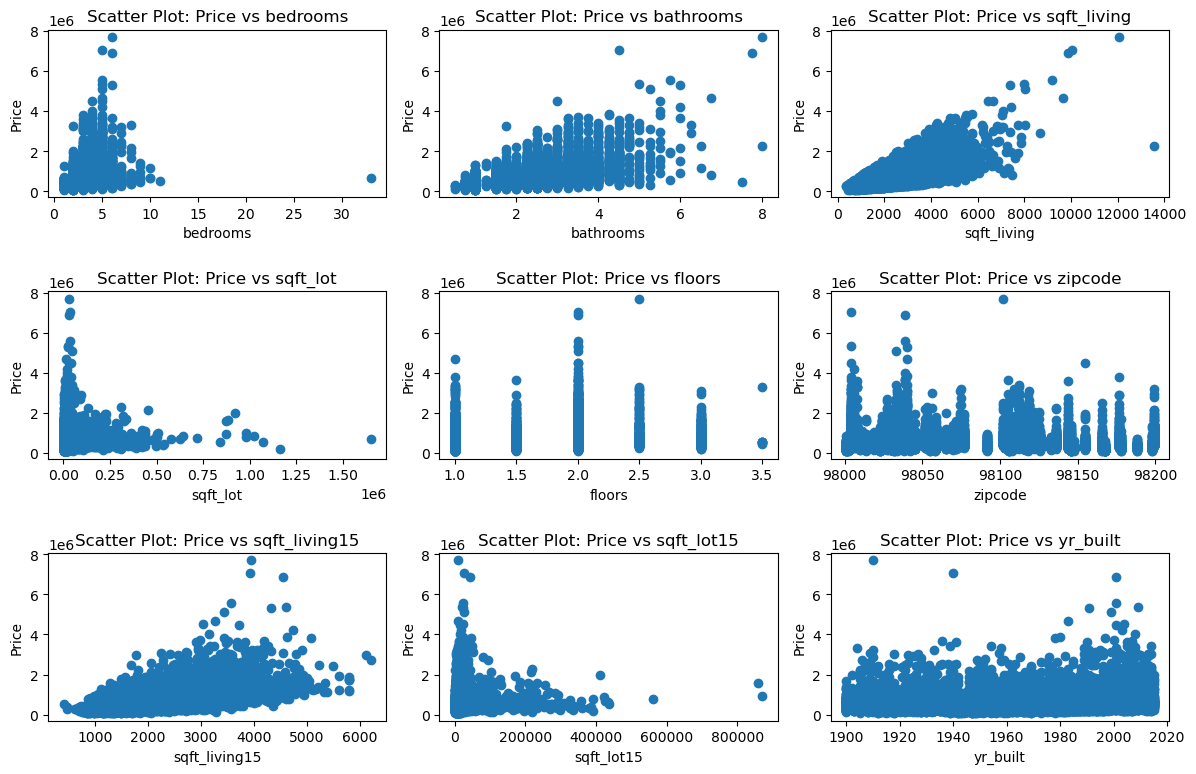

In [26]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','zipcode', 'sqft_living15','sqft_lot15','yr_built']

# Set the figure size and grid layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Perform bivariate analysis for each feature
for i, feature in enumerate(features):
# Calculate the row and column index
    row = i // 3
    col = i % 3
# Scatter Plot
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Scatter Plot: Price vs ' + feature)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('Visualization')

The data indicates a strong correlation between the square footage of living space and price, suggesting that as the living space area increases, the price tends to rise accordingly.

# Modelling and Evaluation

In this section, we will build a simple linear regression model and a multiple linear regression model to predict house prices in the northwestern county. We will evaluate the performance of the models using appropriate metrics such as mean squared error (MSE) and R-squared.

For modelling, we will use the sklearn library and statsmodel library to build the linear regression models. We will split the data into training and testing sets, fit the models, and evaluate their performance using the test data. 

We split the data into training and testing sets using an 80/20 split, where 80% of the data is used for training and 20% for testing. We then fit the models using the training data and evaluate their performance using the test data.



We will use the following metrics to evaluate the performance of the models:
- Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.
- R-squared: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates a better fit.
- Adjusted R-squared: This metric adjusts the R-squared value for the number of predictors in the model. It provides a more accurate measure of the model's goodness of fit when multiple predictors are used.

## Simple Linear Regression Model(Baseline Model)

Based on the correlation analysis carried above, sqft_living has the highest correlation with price. We will use sqft_living as the independent variable to build a simple linear regression model to predict house prices. This model will serve as the baseline model for comparison with the multiple linear regression model.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     5905.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        07:54:30   Log-Likelihood:            -1.6713e+05
No. Observations:               12458   AIC:                         3.343e+05
Df Residuals:                   12456   BIC:                         3.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.472e+05   4330.708     34.001      

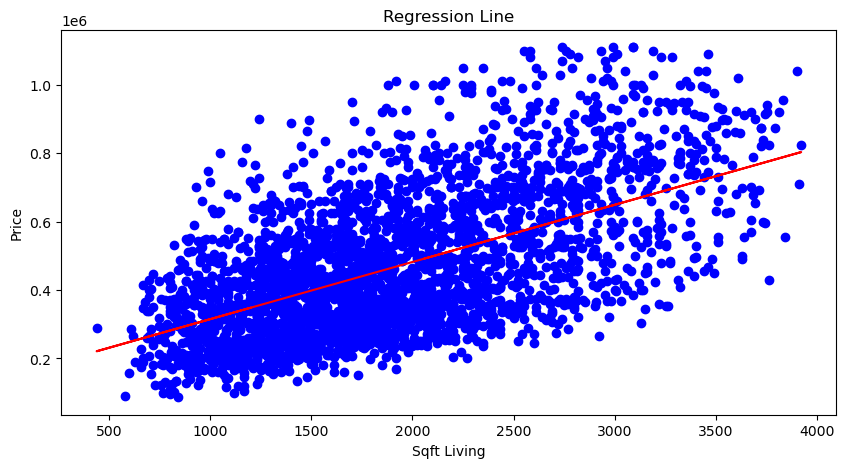

In [27]:
# Define the independent and dependent variables
X = new_data['sqft_living'] # Independent variable
y = new_data['price'] # Dependent variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model using statsmodels
X_train = sm.add_constant(X_train) 

model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Make predictions
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = math.sqrt(mse)

baseline_model = rmse

print("Root Mean Squared Error:", rmse)

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(X_test['sqft_living'], y_test, color='blue') # Scatter plot
plt.plot(X_test['sqft_living'], y_pred, color='red') # Regression line
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Regression Line')
plt.savefig('Visualization3')




### Model Overview
- **Dep. Variable**: The variable being predicted is "price".
- **R-squared**: The proportion of variance in the dependent variable explained by the model. An R-squared of 0.322 suggests that your model explains about 32.2% of the variance in "price". This is relatively low, indicating that there are likely other factors influencing "price" not captured by this model.
- **Adj. R-squared**: This is the R-squared adjusted for the number of predictors in the model. It helps account for overfitting due to extra predictors. Since this model has only one predictor, it's essentially the same as R-squared.
- **F-statistic**: The F-test evaluates the overall significance of the model. A high F-statistic with a p-value close to zero suggests that the model is statistically significant.
- **Prob (F-statistic)**: Since this is effectively zero, the model is significant overall.
- **Root Mean Squared Error (RMSE)**: This represents the average deviation between the predicted and actual values. A lower RMSE indicates better accuracy. In this case, the RMSE is 163990.37, indicating there's substantial error in predictions, hinting that there's room for improvement.

### Coefficients
- **const**: This is the intercept of the regression line. It tells the expected "price" when "sqft_living" is zero. The intercept is 147200, indicating that the baseline price (with zero square feet) would be $147200.
- **sqft_living**: This coefficient (167.38) represents the expected change in "price" for each additional square foot of living space. Since the p-value is close to zero, this coefficient is statistically significant.

### Diagnostics
- **Omnibus, Prob(Omnibus), Jarque-Bera, Prob(JB)**: These tests assess whether the residuals are normally distributed. The low p-values suggest that the residuals are not normally distributed, which could affect the validity of the model.
- **Skew and Kurtosis**: These indicate the asymmetry and tailedness of the residuals. A skew of 0.566 indicates some positive skewness, while a kurtosis of 3.200 suggests the residuals are not far from a normal distribution.

### Condition Number
- A high condition number (5930) might indicate multicollinearity issues or numerical instability. Since this is a simple linear regression with only one predictor, this could signal potential instability in computation.

### Conclusion
Overall, this simple linear regression model indicates that "sqft_living" is a significant predictor of "price," but it doesn't explain a significant proportion of the variance. The high RMSE and low R-squared values suggest that other predictors or interactions might be worth exploring to improve model performance. Additionally, the non-normal distribution of residuals could require addressing before drawing strong conclusions.

## Multiple Linear Regression Model

### 1. We will build a multiple linear regression model using all the numerical features in the dataset to predict house prices. This model will allow us to analyze the combined effect of multiple features on house prices.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1522.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        07:54:31   Log-Likelihood:            -1.6612e+05
No. Observations:               12458   AIC:                         3.322e+05
Df Residuals:                   12451   BIC:                         3.323e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -473.7309   9939.735     -0.048      

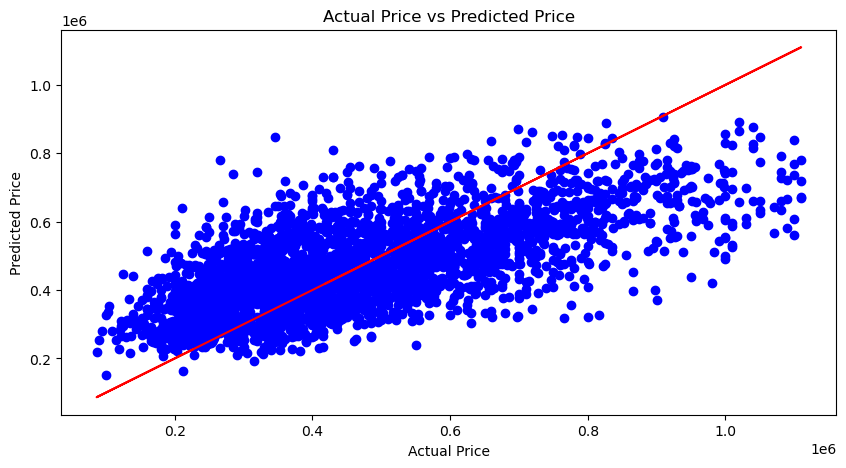

In [28]:
# x_cols -> 'price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built' (Independent variables)
# y_cols -> 'price' (Dependent variable)

# Transform yr_built to build_age 
new_data['build_age'] = 2021 - new_data['yr_built']

# Drop the yr_built column
new_data = new_data.drop('yr_built', axis=1)

# Define the independent and dependent variables
X = new_data[['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','build_age']]
y = new_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model using statsmodels
X_train = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model_1.summary())  

# Make predictions
X_test = sm.add_constant(X_test)
y_pred = model_1.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = math.sqrt(mse)

model_1 = rmse

print("Root Mean Squared Error:", rmse)

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue') # Scatter plot
plt.plot(y_test, y_test, color='red') # Regression line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig('Visualization4')



#### Model Overview
- **Dep. Variable**: This is the target variable being predicting, "price".
- **R-squared**: An R-squared of 0.423 indicates that the model explains about 42.3% of the variance in "price". This is an improvement over the simple linear regression model, suggesting that including multiple predictors provides a better explanation of "price".
- **Adj. R-squared**: Adjusted for the number of predictors, this is also 0.423, indicating a stable improvement.
- **F-statistic and Prob (F-statistic)**: The high F-statistic and near-zero p-value indicate that the model is statistically significant, meaning at least one predictor significantly influences "price".
- **Root Mean Squared Error (RMSE)**: The RMSE of 150556.63 is lower than the previous model's RMSE, suggesting this model has better accuracy, though there's still a significant error in prediction.

#### Coefficients and Their Significance
- **const**: This is the intercept, representing the baseline "price" when all predictors are zero. The coefficient (-473.73) is not statistically significant (p = 0.962), indicating it's unclear what this baseline represents.
- **bedrooms**: The coefficient (-36610) is negative and significant (p < 0.0001). This suggests that, holding other factors constant, an increase in the number of bedrooms is associated with a decrease in "price". This may seem counterintuitive and could be a reflection of other factors like layout, design, or neighborhood.
- **bathrooms**: The coefficient (37020) is positive and significant (p < 0.0001). This implies that each additional bathroom correlates with an increase in "price".
- **sqft_living**: The coefficient (198.04) is positive and significant (p < 0.0001). This aligns with the simple linear regression, indicating that more square footage in living space leads to a higher price.
- **sqft_lot**: The coefficient (-6.20) is negative and significant (p < 0.0001), suggesting a decrease in "price" with an increase in lot size. This might indicate diminishing returns for larger lot sizes.
- **floors**: The coefficient (44740) is positive and significant (p < 0.0001), suggesting an increase in "price" with additional floors.
- **build_age**: The coefficient (2269.71) is positive and significant (p < 0.0001), indicating that newer buildings (lower build_age values) tend to have higher prices.

#### Diagnostics
- **Omnibus, Prob(Omnibus), Jarque-Bera, Prob(JB)**: These tests indicate that the residuals are not normally distributed, similar to the previous model. This might require further investigation or transformation to address.
- **Skew and Kurtosis**: Skewness (0.491) and kurtosis (3.623) suggest residuals are somewhat skewed and slightly more peaked than a normal distribution.
- **Condition Number**: A high condition number (61900) indicates potential multicollinearity or numerical issues. This can impact the reliability of the coefficients.

#### Conclusion
The multiple linear regression model provides a better fit than the simple linear regression, explaining a larger portion of the variance in "price" and yielding a lower RMSE. The coefficients suggest that bedrooms, bathrooms, square footage, lot size, floors, and building age all play a role in determining house prices. However, the non-normal distribution of residuals and high condition number indicate potential issues that may require further investigation or model refinement.

### 2. We will build a multiple linear regression model with categorical variables included.

This model will allow us to analyze the combined effect of both numerical and categorical features on house prices. We will use one-hot encoding to convert the categorical variables into numerical features before fitting the model.

In [29]:
# Categorical columns -> 'waterfront', 'condition', 'grade'
# Numerical columns -> 'bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built'
# Use sklearn to create dummy variables for the categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop= "first", sparse_output=False)

# Specify columns for OneHotEncoding
data_cat = new_data[['waterfront', 'condition', 'grade']].copy()
data_cat

,waterfront,condition,grade
1,NO,Average,7 Average
2,NO,Average,6 Low Average
3,NO,Very Good,7 Average
4,NO,Average,8 Good
6,NO,Average,7 Average
...,...,...,...
21591,NO,Average,8 Good
21592,NO,Average,8 Good
21593,NO,Average,8 Good
21594,NO,Average,7 Average


In [30]:
# Perform OneHotEncoding
ohe.fit(data_cat)
ohe.transform(data_cat)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
# Create the column names based on the features and their categories
column_names = []
for feature, categories in zip(data_cat.columns, ohe.categories_):
    # Exclude the first category if `drop='first'`
    column_names.extend([f"{feature}_{cat}" for cat in categories[1:]])

# Create a DataFrame with the OneHotEncoded data
data_cat_encoded = pd.DataFrame(
    ohe.transform(data_cat),
    columns = column_names 
)
data_cat_encoded


,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
# Append the OneHotEncoded data to the independent variables
X = pd.concat([new_data[['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','build_age']], data_cat_encoded], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,build_age,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,3.0,2.25,2570.0,7242.0,2.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.00,770.0,10000.0,1.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,3.00,1960.0,5000.0,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,2.00,1680.0,8080.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,3.0,2.25,1715.0,6819.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15557,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15559,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15560,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15565,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:

# Drop rows with NaNs in both X and y to maintain consistent length
data = pd.concat([X, y], axis=1)  # Concatenate to ensure consistent row operation
data = data.dropna()  # Drop rows with NaNs

# Re-extract X and y
X_all = data.drop("price", axis=1)
y = data["price"]


In [34]:
# Check for missing values
data.isnull().sum()

bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
build_age              0
waterfront_YES         0
condition_Fair         0
condition_Good         0
condition_Poor         0
condition_Very Good    0
grade_11 Excellent     0
grade_4 Low            0
grade_5 Fair           0
grade_6 Low Average    0
grade_7 Average        0
grade_8 Good           0
grade_9 Better         0
price                  0
dtype: int64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     376.6
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        07:54:31   Log-Likelihood:            -1.1925e+05
No. Observations:                8940   AIC:                         2.385e+05
Df Residuals:                    8921   BIC:                         2.387e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.544e+04   1

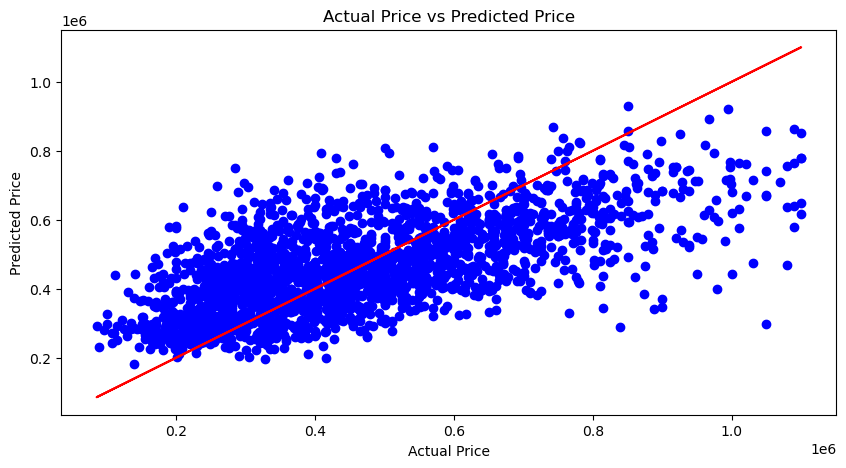

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Build the model using statsmodels
X_train = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model_2.summary())

# Make predictions
X_test = sm.add_constant(X_test)
y_pred = model_2.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = math.sqrt(mse)

print("Root Mean Squared Error:", rmse)

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue') # Scatter plot
plt.plot(y_test, y_test, color='red') # Regression line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig('Visualization5')



#### Model Overview
- **R-squared and Adj. R-squared**: An R-squared of 0.432 and an adjusted R-squared of 0.431 indicate that the model explains about 43.2% of the variance in "price." This is a slight improvement over the model with only numeric features, suggesting that the additional categorical features contribute to a better explanation of "price."
- **F-statistic and Prob (F-statistic)**: The high F-statistic and near-zero p-value indicate that the model as a whole is statistically significant.
- **Root Mean Squared Error (RMSE)**: The RMSE of 152353.94 is slightly higher than the model with only numeric features (150556.63), suggesting similar but slightly lower accuracy in prediction.

#### Coefficients and Their Significance
- **const**: The intercept (-35443.73) is negative and significant at the 0.022 level. This indicates the baseline "price" when all predictors are at their reference levels.
- **bedrooms**: The coefficient (-35070) is negative and significant, suggesting that more bedrooms correlate with a lower "price." This could be related to other factors influencing the market value.
- **bathrooms**: The coefficient (39280) is positive and significant, indicating that more bathrooms correlate with a higher "price."
- **sqft_living**: The coefficient (203.49) is positive and significant, aligning with previous results indicating that more living space leads to a higher "price."
- **sqft_lot**: The coefficient (-5.58) is negative and significant, suggesting that larger lot sizes might be associated with lower "price."
- **floors**: The coefficient (35880) is positive and significant, indicating that more floors correlate with higher "price."
- **build_age**: The coefficient (2408.73) is positive and significant, suggesting that newer buildings tend to be valued higher.

#### Categorical Features
- **waterfront_YES**: This coefficient (50980) is not statistically significant (p = 0.192), indicating that the effect of having a waterfront is not clearly defined.
- **condition_Fair, condition_Good, condition_Poor, condition_Very Good**: None of these coefficients are statistically significant, suggesting that "condition" does not significantly impact "price" when controlling for other factors.
- **grade_11 Excellent, grade_4 Low, grade_5 Fair, grade_6 Low Average, grade_7 Average, grade_8 Good, grade_9 Better**: None of these "grade" coefficients are statistically significant, indicating that the "grade" does not have a clear impact on "price."

#### Diagnostics
- **Omnibus, Prob(Omnibus), Jarque-Bera, Prob(JB)**: These tests suggest that residuals might not be normally distributed, indicating potential issues with model assumptions.
- **Skew and Kurtosis**: A skewness of 0.461 and kurtosis of 3.497 suggest residuals are somewhat skewed and slightly more peaked than a normal distribution.
- **Condition Number**: A very high condition number (330000) indicates strong multicollinearity or numerical instability, which can lead to unreliable coefficients and other computational issues.

#### Conclusion
This model includes categorical features and has a higher R-squared, suggesting it explains more variance in "price" than the previous models. However, the RMSE is slightly higher, indicating some loss of accuracy. Many of the categorical features (like "waterfront" and "condition") do not show statistically significant relationships with "price," indicating that they might not add substantial explanatory power to the model.


### Feature Selection

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        08:25:50   Log-Likelihood:            -1.1925e+05
No. Observations:                8940   AIC:                         2.385e+05
Df Residuals:                    8933   BIC:                         2.386e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.091e+04   1.18e+04     -1.768      

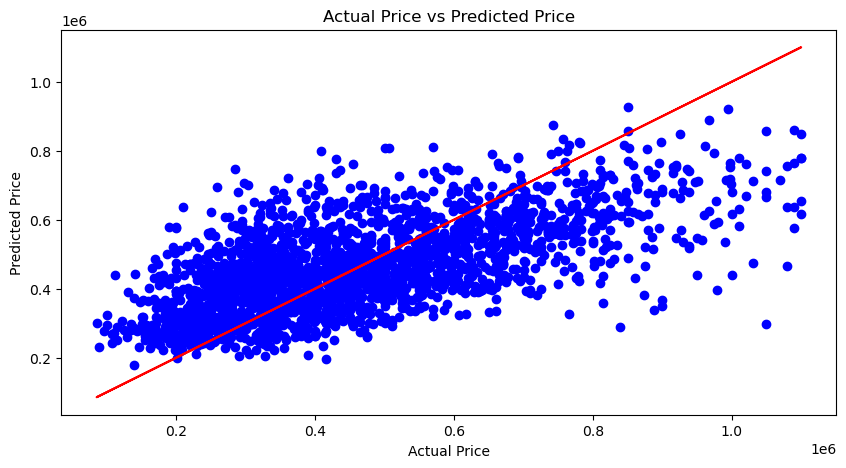

In [45]:
# Feature selection
# Use the p-values to select the significant features
significant_features = model_2.pvalues[model_2.pvalues < 0.05].index


# Drop const from the significant features
significant_features = significant_features.drop('const')

# Extract the significant features from the data
X_significant = X_all[significant_features]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=42)

# Build the model using statsmodels
X_train = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model_3.summary())

# Make predictions
X_test = sm.add_constant(X_test)
y_pred = model_3.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = math.sqrt(mse)

print("Root Mean Squared Error:", rmse)

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue') # Scatter plot
plt.plot(y_test, y_test, color='red') # Regression line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig('Visualization6')




#### Model Overview
- **R-squared and Adj. R-squared**: An R-squared of 0.431 and an adjusted R-squared of 0.431 indicate that the model explains about 43.1% of the variance in "price." This is similar to the previous model with all features, suggesting that the feature selection process retained the key predictors.
- **F-statistic and Prob (F-statistic)**: The high F-statistic and near-zero p-value indicate that the model is statistically significant.
- **Root Mean Squared Error (RMSE)**: The RMSE of 152268.54 is slightly lower than the previous model with all features, suggesting improved accuracy due to feature selection.

#### Coefficients and Their Significance
- **const**: The intercept (-20910) is not statistically significant (p = 0.077), suggesting that the baseline "price" when all predictors are at their reference levels has limited meaning.
- **bedrooms**: The coefficient (-34980) is negative and significant, indicating that an increase in the number of bedrooms correlates with a decrease in "price." This is consistent with previous models and could reflect complex interactions between property size, design, and other features.
- **bathrooms**: The coefficient (39380) is positive and significant, indicating that each additional bathroom correlates with an increase in "price."
- **sqft_living**: The coefficient (203.41) is positive and significant, suggesting that more living space leads to higher prices.
- **sqft_lot**: The coefficient (-5.59) is negative and significant, suggesting that larger lot sizes might be associated with lower prices. This might indicate that the size of the lot doesn't necessarily add proportional value.
- **floors**: The coefficient (35680) is positive and significant, indicating that more floors correlate with higher prices.
- **build_age**: The coefficient (2406.26) is positive and significant, indicating that newer properties (lower build_age values) tend to be valued higher.

#### Diagnostics
- **Omnibus, Prob(Omnibus), Jarque-Bera, Prob(JB)**: These tests suggest that residuals might not be normally distributed, indicating potential issues with model assumptions.
- **Skew and Kurtosis**: A skewness of 0.462 and kurtosis of 3.495 suggest residuals are somewhat skewed and slightly more peaked than a normal distribution.
- **Condition Number**: A high condition number (64000) suggests potential multicollinearity or numerical instability, although it's lower than in the previous model, indicating improvement.

#### Conclusion
The final model with feature selection shows a similar R-squared to the previous model but a slightly lower RMSE, indicating improved accuracy. The significant coefficients in this model are consistent with those in previous models, suggesting these are the key factors influencing "price."
Overall, feature selection seems to have improved the model by focusing on the most significant predictors, resulting in a simpler model with slightly improved accuracy. However, further examination of the model's assumptions and multicollinearity could lead to even better results.

## Model Comparison

To compare models, we typically look at a few key metrics and assess how each model performs with respect to explaining the variance in the dependent variable, accuracy, and stability. In this case, let's consider the following metrics to compare your models:

1. **R-squared and Adjusted R-squared**: These indicate the proportion of variance explained by the model. Higher values suggest a better fit.
2. **Root Mean Squared Error (RMSE)**: This measures the average error between predicted and actual values. Lower values indicate better accuracy.
3. **F-statistic and Prob (F-statistic)**: The F-statistic tests the overall significance of the model. A higher F-statistic with a near-zero p-value suggests the model is statistically significant.
4. **Significance of Coefficients**: A model with fewer but significant coefficients can be more robust than a complex model with many insignificant coefficients.

### Model 1: Simple Linear Regression
- **R-squared**: 0.322
- **Adj. R-squared**: 0.322
- **RMSE**: 163990.37
- **F-statistic and Prob (F-statistic)**: 5905.0 (Prob = 0.00)
- This simple model has a relatively low R-squared, indicating it explains only 32.2% of the variance in "price." The RMSE is high, suggesting significant prediction errors.

### Model 2: Multiple Linear Regression with Numeric Features
- **R-squared**: 0.423
- **Adj. R-squared**: 0.423
- **RMSE**: 150556.63
- **F-statistic and Prob (F-statistic)**: 1522.0 (Prob = 0.00)
- This model shows improved R-squared and RMSE compared to the simple linear regression model. 

### Model 3: Multiple Linear Regression with All Features (including categorical)
- **R-squared**: 0.432
- **Adj. R-squared**: 0.431
- **RMSE**: 152353.94
- **F-statistic and Prob (F-statistic)**: 376.6 (Prob = 0.00)
- This model has the highest R-squared, indicating it explains more variance in "price." However, it has a slightly higher RMSE compared to Model 2, suggesting some loss of accuracy. 

### Model 4: Final Model with Feature Selection
- **R-squared**: 0.431
- **Adj. R-squared**: 0.431
- **RMSE**: 152268.54
- **F-statistic and Prob (F-statistic)**: 1128.0 (Prob = 0.00)
- This model has similar R-squared to Model 3 but a lower RMSE, indicating slightly better accuracy. 

### Summary
- **Model 4 (Final Model with Feature Selection)** seems to offer the best balance between explaining the variance in "price" (R-squared of 0.431), accuracy (RMSE of 152268.54), and stability (condition number of 64000).
- **Model 3 (with All Features)** has the highest R-squared but suffers from a high condition number, indicating potential multicollinearity issues.
- **Model 2 (with Numeric Features)** shows a good balance but with slightly lower accuracy than Model 4.
- **Model 1 (Simple Linear Regression)** has the lowest R-squared and highest RMSE, indicating it's the least effective in predicting "price."

Based on these comparisons, Model 4 seems to be the most robust, with a balance of explaining variance, accuracy, and stability. 

# Conclusion

This analysis of the northwestern county real estate market using a multiple regression model has yielded valuable insights to understand factors influencing house prices. Below are the key conclusions:

- Square footage of living space (sqft_living) is the most significant factor influencing house price. Larger houses tend to be more expensive.
- Number of bathrooms (bathrooms) has a positive and statistically significant relationship with price, suggesting more bathrooms are associated with higher-priced houses.
- Number of floors (floors) also has a positive and statistically significant relationship with price, indicating that multi-story homes tend to be more valuable.
- Building age (yr_built) has a negative and statistically significant relationship with price in the last model. This suggests a preference for newer houses, which aligns with expectations of potentially having modern features or amenities.
- The effect of lot size (sqft_lot) is interesting. It has a negative and statistically significant relationship with price, suggesting that larger lots might be associated with lower priced properties. This could be due to factors like location or property density requiring further investigation.
- The number of bedrooms (bedrooms) might have a non-linear relationship with price. The last model suggests a negative coefficient, but this might not capture the full picture. Very large numbers of bedrooms could have a negative impact, while a standard number might not. Further analysis using techniques like polynomial regression is recommended.
- Having a waterfront location (waterfront_YES) does not have a statistically significant impact on price in this dataset. There could be other factors influencing waterfront property values that need to be explored.
- Condition and grade features were not statistically significant in the last model. This could mean they don't have a strong independent effect on price, or there might be collinearity with other features.

Overall, this analysis provides a starting point for real estate agencies to understand some key factors influencing house prices in the northwestern county market.

# Recommendation


Based on the conclusions we derived from the data analysis and modeling, here are some recommendations for real estate agencies in the northwestern county market:


- Leverage the Model: The model is a valuable tool to estimate a baseline price for houses based on key factors like square footage, number of bathrooms, floors, and age. Real estate agencies can use these estimates as a starting point for developing competitive pricing strategies for their clients.
- Consider Non-Linear Relationships: The analysis suggests a possible non-linear relationship between bedrooms and price. Agencies can explore this further by segmenting the data by number of bedrooms and analyzing price trends within each segment. This can help identify potential sweet spots for pricing based on bedroom count.
- Highlight Key Selling Points: The model confirms that factors like square footage, bathrooms, and floors significantly influence price. Agencies can emphasize these features when showcasing properties, especially for larger houses, those with more bathrooms or multiple floors.
- Manage Expectations for Waterfront Properties: Since waterfront location didn't show a statistically significant impact on price, agencies should focus on other unique aspects of waterfront properties when marketing them. They can also manage client expectations by explaining that waterfront location alone might not significantly inflate the price compared to similar non-waterfront properties.
- Address Lot Size Cautiously: The negative correlation between lot size and price is interesting, but further exploration is needed. Agencies should be cautious about using lot size as a selling point unless they have a clear understanding of how it affects price within specific locations.
- Stay Informed About Market Trends: The model is based on historical data and might not capture future market fluctuations. Agencies should stay informed about broader economic trends and local market changes that could influence house prices.
- Invest in Model Refinement: As additional data becomes available and market dynamics change, the model can be revisited and refined. Agencies can invest in ongoing data analysis and model updates to ensure they have the most relevant information for client guidance.

By following these recommendations, real estate agencies can leverage the insights gained from this analysis to make data-driven decisions, provide more informed advice to their clients, and ultimately achieve better outcomes in the northwestern county real estate market.